https://github.com/vivek081166/raw-audio-deep-learning/blob/master/constants.py

In [31]:
import pickle
from glob import iglob
import numpy as np
import librosa
from shutil import rmtree
from constants import *
# from constants import DATA_AUDIO_DIR

DATA_AUDIO_DIR = './test_train_data'
list_dir = os.listdir(DATA_AUDIO_DIR)
list_dir.sort()
TARGET_SR = 8000
AUDIO_LENGTH = 100000

def mkdir_p(path):
    import errno
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise


# def del_folder(path):
#     try:
#         rmtree(path)
#     except:
#         pass


# del_folder(OUTPUT_DIR_TRAIN)
# del_folder(OUTPUT_DIR_TEST)
# mkdir_p(OUTPUT_DIR_TRAIN)
# mkdir_p(OUTPUT_DIR_TEST)

order = 0
class_ids = {list_dir[i]: i for i in range(len(list_dir))}


def extract_class_id(wav_filename):
    return class_ids.get(wav_filename[18:-6])


def read_audio_from_filename(filename, target_sr):
    audio, _ = librosa.load(filename, sr=target_sr, mono=True)
    audio = audio.reshape(-1, 1)
    return audio


def convert_data():
    DATA_AUDIO_DIR = './test_train_data'
    list_dir = os.listdir(DATA_AUDIO_DIR)
    list_dir.sort()
#     TARGET_SR = 16000
#     AUDIO_LENGTH = 200000
    for i, wav_filename in enumerate(iglob(os.path.join(DATA_AUDIO_DIR, '**/**.wav'), recursive=True)):
#         print(i, wav_filename)
        class_id = extract_class_id(wav_filename)
        audio_buf = read_audio_from_filename(wav_filename, target_sr=TARGET_SR)
        # normalize mean 0, variance 1
        audio_buf = (audio_buf - np.mean(audio_buf)) / np.std(audio_buf)
        original_length = len(audio_buf)
        print(i, wav_filename, original_length, np.round(np.mean(audio_buf), 4), np.std(audio_buf))
        if original_length < AUDIO_LENGTH:
            audio_buf = np.concatenate((audio_buf, np.zeros(shape=(AUDIO_LENGTH - original_length, 1))))
            print('PAD New length =', len(audio_buf))
        elif original_length > AUDIO_LENGTH:
            audio_buf = audio_buf[20000:AUDIO_LENGTH+20000]
            print('CUT New length =', len(audio_buf))

        output_folder = OUTPUT_DIR_TRAIN
        if wav_filename[-5:] == '5.wav':
            output_folder = OUTPUT_DIR_TEST

        output_filename = os.path.join(output_folder, str(wav_filename[18:-4]).replace('/', '_') + '.pkl')
#         TARGET_SR = 16000
        out = {'class_id': class_id,
               'audio': audio_buf,
               'sr': TARGET_SR}
        print("-----------------")
        print(out)
        with open(output_filename, 'wb') as w:
            pickle.dump(out, w)


if __name__ == '__main__':
    convert_data()

0 ./test_train_data/2017019770032_kimdayeong/5.wav 284331 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 66, 'audio': array([[-1.0040153 ],
       [-1.5955637 ],
       [-1.446912  ],
       ...,
       [-2.3598163 ],
       [-0.8567233 ],
       [ 0.73898965]], dtype=float32), 'sr': 8000}
1 ./test_train_data/2017019770032_kimdayeong/1.wav 291158 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 66, 'audio': array([[ 0.00456055],
       [-0.20514086],
       [ 0.15138951],
       ...,
       [ 1.9472203 ],
       [ 0.9564877 ],
       [-0.05469209]], dtype=float32), 'sr': 8000}
2 ./test_train_data/2017019770032_kimdayeong/3.wav 274432 0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 66, 'audio': array([[-0.74078405],
       [-0.75316674],
       [-0.85607004],
       ...,
       [-0.62088066],
       [-0.9319148 ],
       [-1.1354662 ]], dtype=float32), 'sr': 8000}
3 ./test_train_data/2017019770032_kimdayeong/2.wav 263168 0.0 1.0
CUT N

27 ./test_train_data/2017019880039_seojuyeon/3.wav 239787 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 113, 'audio': array([[1.7095629 ],
       [1.1804057 ],
       [0.27336353],
       ...,
       [0.00953922],
       [0.00819988],
       [0.01529233]], dtype=float32), 'sr': 8000}
28 ./test_train_data/2017019880039_seojuyeon/2.wav 232448 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 113, 'audio': array([[ 4.419241  ],
       [ 3.0566006 ],
       [ 1.2494262 ],
       ...,
       [ 0.02447747],
       [ 0.07990162],
       [-0.01916598]], dtype=float32), 'sr': 8000}
29 ./test_train_data/2017019880039_seojuyeon/4.wav 233814 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 113, 'audio': array([[ 0.5140881 ],
       [ 0.55016625],
       [ 0.5083051 ],
       ...,
       [-0.00194724],
       [-0.01084619],
       [-0.00334245]], dtype=float32), 'sr': 8000}
30 ./test_train_data/2017019770023_kimsoyung/5.wav 225327 -0.0 1.0
CUT New lengt

54 ./test_train_data/2017019880034_leesujung/4.wav 255048 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 108, 'audio': array([[ 0.01609175],
       [ 0.01488369],
       [-0.00944432],
       ...,
       [ 0.00305732],
       [-0.00742127],
       [-0.00063677]], dtype=float32), 'sr': 8000}
55 ./test_train_data/2017019880032_seoyeonjoo/5.wav 215040 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 106, 'audio': array([[-0.83931184],
       [-0.8651564 ],
       [-1.7913351 ],
       ...,
       [-0.5804962 ],
       [-0.1629709 ],
       [-0.38532397]], dtype=float32), 'sr': 8000}
56 ./test_train_data/2017019880032_seoyeonjoo/1.wav 238080 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 106, 'audio': array([[-0.1272308 ],
       [ 0.29983008],
       [ 0.7946672 ],
       ...,
       [ 0.24981464],
       [-0.01513292],
       [ 0.2568113 ]], dtype=float32), 'sr': 8000}
57 ./test_train_data/2017019880032_seoyeonjoo/3.wav 234155 -0.0 1.0
CUT N

81 ./test_train_data/2017019880037_jusunghyun/1.wav 223284 -0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 111, 'audio': array([[-0.07293233],
       [-0.34795624],
       [-0.45452705],
       ...,
       [ 2.6671345 ],
       [ 3.4468408 ],
       [ 3.59567   ]], dtype=float32), 'sr': 8000}
82 ./test_train_data/2017019880037_jusunghyun/3.wav 214181 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 111, 'audio': array([[0.03315928],
       [0.01998352],
       [0.01051236],
       ...,
       [2.7258587 ],
       [1.6182733 ],
       [2.9084604 ]], dtype=float32), 'sr': 8000}
83 ./test_train_data/2017019880037_jusunghyun/2.wav 215853 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 111, 'audio': array([[-0.03444026],
       [ 0.04269205],
       [-0.04381517],
       ...,
       [ 0.6234803 ],
       [ 1.3761482 ],
       [ 0.7613725 ]], dtype=float32), 'sr': 8000}
84 ./test_train_data/2017019880037_jusunghyun/4.wav 197649 0.0 1.0
CUT 

108 ./test_train_data/2017019770030_leejeongju/2.wav 222167 0.0 1.0000001
CUT New length = 100000
-----------------
{'class_id': 64, 'audio': array([[0.12445963],
       [0.08325649],
       [0.04092858],
       ...,
       [0.02095746],
       [0.00107441],
       [0.01556909]], dtype=float32), 'sr': 8000}
109 ./test_train_data/2017019770030_leejeongju/4.wav 218508 -0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 64, 'audio': array([[-0.00688405],
       [-0.08053416],
       [-0.11512726],
       ...,
       [ 0.30678007],
       [ 0.3177859 ],
       [ 1.2569054 ]], dtype=float32), 'sr': 8000}
110 ./test_train_data/2017019880022_kimjaein/5.wav 224758 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 96, 'audio': array([[-3.8290765],
       [-3.476629 ],
       [-3.4145887],
       ...,
       [ 1.4597805],
       [ 1.4825408],
       [ 1.4506831]], dtype=float32), 'sr': 8000}
111 ./test_train_data/2017019880022_kimjaein/1.wav 225440 -0.0 1.0
CUT Ne

140 ./test_train_data/2017019740024_choijiwon/5.wav 252416 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 23, 'audio': array([[-0.07236642],
       [ 0.00053329],
       [ 0.06720696],
       ...,
       [ 0.16053796],
       [ 0.28103548],
       [ 0.35643637]], dtype=float32), 'sr': 8000}
141 ./test_train_data/2017019740024_choijiwon/1.wav 264192 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 23, 'audio': array([[-0.273378  ],
       [-0.19701745],
       [-0.08476083],
       ...,
       [ 0.67581135],
       [ 0.8409469 ],
       [ 1.2692068 ]], dtype=float32), 'sr': 8000}
142 ./test_train_data/2017019740024_choijiwon/3.wav 253440 0.0 0.9999999
CUT New length = 100000
-----------------
{'class_id': 23, 'audio': array([[2.3621116 ],
       [1.8324735 ],
       [1.1933652 ],
       ...,
       [0.7742999 ],
       [1.0809302 ],
       [0.72326857]], dtype=float32), 'sr': 8000}
143 ./test_train_data/2017019740024_choijiwon/2.wav 256342 -0.0 0.99999994


167 ./test_train_data/2017019740034_kimdongwook/3.wav 205643 0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 33, 'audio': array([[0.42526042],
       [0.62878495],
       [0.84315753],
       ...,
       [0.97979295],
       [0.8645819 ],
       [0.8940243 ]], dtype=float32), 'sr': 8000}
168 ./test_train_data/2017019740034_kimdongwook/2.wav 224928 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 33, 'audio': array([[0.4535098 ],
       [0.5153149 ],
       [0.61340404],
       ...,
       [0.01183862],
       [0.00184485],
       [0.00169995]], dtype=float32), 'sr': 8000}
169 ./test_train_data/2017019740034_kimdongwook/4.wav 205472 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 33, 'audio': array([[-0.01701244],
       [-0.25098482],
       [-0.1950696 ],
       ...,
       [ 0.7302973 ],
       [ 0.29697877],
       [-0.2029636 ]], dtype=float32), 'sr': 8000}
170 ./test_train_data/2017019880014_leedanbee/5.wav 245238 0.0 1.0
CUT New 

194 ./test_train_data/2017019880024_hanyukyung/4.wav 213996 -0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 98, 'audio': array([[ 0.73422915],
       [ 0.43412447],
       [-2.1782255 ],
       ...,
       [ 1.1391952 ],
       [ 1.3686877 ],
       [ 2.2655585 ]], dtype=float32), 'sr': 8000}
195 ./test_train_data/2017019740033_kimdongseon/5.wav 243883 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 32, 'audio': array([[ 0.3895178 ],
       [ 0.01052751],
       [-0.40609562],
       ...,
       [-0.03646626],
       [-0.00933698],
       [ 0.00329624]], dtype=float32), 'sr': 8000}
196 ./test_train_data/2017019740033_kimdongseon/1.wav 249174 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 32, 'audio': array([[1.421271  ],
       [1.5477086 ],
       [1.6936859 ],
       ...,
       [0.13238591],
       [0.18694372],
       [0.1585177 ]], dtype=float32), 'sr': 8000}
197 ./test_train_data/2017019740033_kimdongseon/3.wav 252587 -0.0 1

221 ./test_train_data/2017019740005_moonyeonwoo/1.wav 221515 0.0 0.9999999
CUT New length = 100000
-----------------
{'class_id': 4, 'audio': array([[ 0.05420295],
       [-0.12110816],
       [-0.438162  ],
       ...,
       [-3.704042  ],
       [-2.7773292 ],
       [-1.6112888 ]], dtype=float32), 'sr': 8000}
222 ./test_train_data/2017019740005_moonyeonwoo/3.wav 187894 0.0 0.9999999
CUT New length = 100000
-----------------
{'class_id': 4, 'audio': array([[ 0.38214067],
       [ 0.3050751 ],
       [ 0.42993906],
       ...,
       [-3.5454323 ],
       [-2.2557905 ],
       [ 0.07060473]], dtype=float32), 'sr': 8000}
223 ./test_train_data/2017019740005_moonyeonwoo/2.wav 212470 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 4, 'audio': array([[-0.6639503 ],
       [-0.39877704],
       [-0.6038005 ],
       ...,
       [ 1.443994  ],
       [ 1.8582604 ],
       [ 1.9620309 ]], dtype=float32), 'sr': 8000}
224 ./test_train_data/2017019740005_moonyeonwoo/4.wav 201376 

248 ./test_train_data/2017019880023_yoohaekyung/2.wav 280918 -0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 97, 'audio': array([[-1.7215482 ],
       [-1.6717801 ],
       [-1.4036195 ],
       ...,
       [-0.02223429],
       [-0.01287464],
       [-0.02465347]], dtype=float32), 'sr': 8000}
249 ./test_train_data/2017019880023_yoohaekyung/4.wav 265558 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 97, 'audio': array([[ 0.0591072 ],
       [ 0.03590611],
       [ 0.0386215 ],
       ...,
       [-0.1815804 ],
       [-0.19505434],
       [-0.16140741]], dtype=float32), 'sr': 8000}
250 ./test_train_data/2017019880015_leejungjoon/5.wav 186848 0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 89, 'audio': array([[ 0.05296234],
       [ 1.6404165 ],
       [ 2.186905  ],
       ...,
       [-0.79255563],
       [-0.96046656],
       [-1.1421213 ]], dtype=float32), 'sr': 8000}
251 ./test_train_data/2017019880015_leejungjoon/1.wav 

275 ./test_train_data/2017019770018_janggyeoul/5.wav 201654 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 52, 'audio': array([[ 0.00794381],
       [ 0.04578924],
       [ 0.06465885],
       ...,
       [-0.0319666 ],
       [ 0.06855132],
       [ 0.09934685]], dtype=float32), 'sr': 8000}
276 ./test_train_data/2017019770018_janggyeoul/1.wav 205390 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 52, 'audio': array([[ 0.01318087],
       [ 0.06034557],
       [-0.0135992 ],
       ...,
       [ 1.585717  ],
       [ 0.9818106 ],
       [ 0.26922393]], dtype=float32), 'sr': 8000}
277 ./test_train_data/2017019770018_janggyeoul/3.wav 198006 0.0 0.9999999
CUT New length = 100000
-----------------
{'class_id': 52, 'audio': array([[ 0.5140382 ],
       [ 0.277446  ],
       [ 0.20978142],
       ...,
       [-0.16848052],
       [-0.05418527],
       [-0.15656516]], dtype=float32), 'sr': 8000}
278 ./test_train_data/2017019770018_janggyeoul/2.wav 206448 -0.0 

305 ./test_train_data/2017019770021_heoyoonjung/5.wav 172757 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 55, 'audio': array([[-0.17087302],
       [-0.19560619],
       [-0.28515273],
       ...,
       [ 0.04085881],
       [ 0.04117863],
       [ 0.01135276]], dtype=float32), 'sr': 8000}
306 ./test_train_data/2017019770021_heoyoonjung/1.wav 194119 -0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 55, 'audio': array([[-0.01722829],
       [ 0.03215856],
       [ 0.02079475],
       ...,
       [-0.00820399],
       [-0.01011254],
       [-0.02018573]], dtype=float32), 'sr': 8000}
307 ./test_train_data/2017019770021_heoyoonjung/3.wav 180187 0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 55, 'audio': array([[ 1.4512748 ],
       [ 0.8843037 ],
       [ 0.29167622],
       ...,
       [-1.3070333 ],
       [ 0.20742385],
       [ 1.2691022 ]], dtype=float32), 'sr': 8000}
308 ./test_train_data/2017019770021_heoyoonjung/2.wav 

332 ./test_train_data/2017019880020_yoonhyeeun/3.wav 206336 -0.0 1.0000001
CUT New length = 100000
-----------------
{'class_id': 94, 'audio': array([[-0.2839623 ],
       [-0.30577335],
       [-0.3967031 ],
       ...,
       [ 0.16374366],
       [ 0.8218879 ],
       [ 1.0537757 ]], dtype=float32), 'sr': 8000}
333 ./test_train_data/2017019880020_yoonhyeeun/2.wav 219648 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 94, 'audio': array([[ 0.72939986],
       [ 0.57255685],
       [ 0.4887673 ],
       ...,
       [-0.74461085],
       [-0.95760345],
       [-0.8201293 ]], dtype=float32), 'sr': 8000}
334 ./test_train_data/2017019880020_yoonhyeeun/4.wav 207360 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 94, 'audio': array([[ 0.41545647],
       [ 0.39164814],
       [ 0.3587102 ],
       ...,
       [-1.2493825 ],
       [-1.4338226 ],
       [-1.7293668 ]], dtype=float32), 'sr': 8000}
335 ./test_train_data/2017019880003_kimminji/5.wav 237773 0.0 1.

360 ./test_train_data/2017019770037_jeonghojun/5.wav 257536 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 71, 'audio': array([[-0.00650714],
       [ 0.0008686 ],
       [ 0.00043607],
       ...,
       [ 0.01870208],
       [ 0.01587858],
       [ 0.00495011]], dtype=float32), 'sr': 8000}
361 ./test_train_data/2017019770037_jeonghojun/1.wav 289280 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 71, 'audio': array([[ 0.00098266],
       [ 0.0122394 ],
       [ 0.01573036],
       ...,
       [-0.3784257 ],
       [-0.2805323 ],
       [-0.20444888]], dtype=float32), 'sr': 8000}
362 ./test_train_data/2017019770037_jeonghojun/3.wav 238592 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 71, 'audio': array([[-0.41532454],
       [-0.45257375],
       [-0.60009587],
       ...,
       [ 0.7464399 ],
       [ 0.3920972 ],
       [ 0.30473912]], dtype=float32), 'sr': 8000}
363 ./test_train_data/2017019770037_jeonghojun/2.wav 258048 0.0 0.999999

390 ./test_train_data/2017019880036_kimjihye/5.wav 216782 -0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 110, 'audio': array([[ 3.7453132],
       [ 3.5809925],
       [ 3.4779418],
       ...,
       [-3.2242506],
       [-2.4209845],
       [-3.7032914]], dtype=float32), 'sr': 8000}
391 ./test_train_data/2017019880036_kimjihye/1.wav 222169 -0.0 0.9999999
CUT New length = 100000
-----------------
{'class_id': 110, 'audio': array([[ 0.5727822 ],
       [ 0.85619473],
       [ 0.915811  ],
       ...,
       [-3.0648565 ],
       [-4.340737  ],
       [-4.4293375 ]], dtype=float32), 'sr': 8000}
392 ./test_train_data/2017019880036_kimjihye/3.wav 212138 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 110, 'audio': array([[ 0.70759594],
       [ 2.3777537 ],
       [ 2.6971974 ],
       ...,
       [-1.2108419 ],
       [-1.3761442 ],
       [-1.1188442 ]], dtype=float32), 'sr': 8000}
393 ./test_train_data/2017019880036_kimjihye/2.wav 219383 -0.0 1.0

417 ./test_train_data/2017019740012_chaeminjoon/3.wav 239094 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 11, 'audio': array([[ 0.07674069],
       [-0.1133085 ],
       [-0.19110179],
       ...,
       [ 0.01296807],
       [ 0.00863291],
       [ 0.01024378]], dtype=float32), 'sr': 8000}
418 ./test_train_data/2017019740012_chaeminjoon/2.wav 204619 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 11, 'audio': array([[-0.87105423],
       [-1.0251708 ],
       [-1.0800631 ],
       ...,
       [ 0.02793742],
       [-0.53447616],
       [-0.95049226]], dtype=float32), 'sr': 8000}
419 ./test_train_data/2017019740012_chaeminjoon/4.wav 219296 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 11, 'audio': array([[-0.00780502],
       [ 0.00806756],
       [ 0.12581113],
       ...,
       [-0.1240846 ],
       [ 0.0149115 ],
       [ 0.09386437]], dtype=float32), 'sr': 8000}
420 ./test_train_data/2017019770009_yuminji/5.wav 232960 -0.0 1.0
CUT

444 ./test_train_data/2017019740023_heosehun/4.wav 228864 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 22, 'audio': array([[-1.0476077 ],
       [-2.5225308 ],
       [-3.0961037 ],
       ...,
       [-0.00852736],
       [-0.00313097],
       [-0.00789599]], dtype=float32), 'sr': 8000}
445 ./test_train_data/2017019770003_johaesu/5.wav 222208 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 37, 'audio': array([[ 0.40051123],
       [-0.10622001],
       [-0.27651495],
       ...,
       [ 0.0026026 ],
       [-0.01733437],
       [ 0.05244502]], dtype=float32), 'sr': 8000}
446 ./test_train_data/2017019770003_johaesu/1.wav 242688 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 37, 'audio': array([[ 0.00201817],
       [ 0.05484017],
       [-0.03203812],
       ...,
       [-0.11474625],
       [-0.17868866],
       [-0.12100149]], dtype=float32), 'sr': 8000}
447 ./test_train_data/2017019770003_johaesu/3.wav 246784 -0.0 1.0
CUT New length

471 ./test_train_data/2017019880029_kimminji/1.wav 254677 -0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 103, 'audio': array([[ 0.06408073],
       [ 0.03491092],
       [ 0.0213105 ],
       ...,
       [-0.09633727],
       [-0.08247145],
       [-0.06408631]], dtype=float32), 'sr': 8000}
472 ./test_train_data/2017019880029_kimminji/3.wav 228485 -0.0 0.9999998
CUT New length = 100000
-----------------
{'class_id': 103, 'audio': array([[-0.01133974],
       [-0.01684468],
       [-0.01486269],
       ...,
       [ 0.0180928 ],
       [ 0.0049122 ],
       [-0.01101948]], dtype=float32), 'sr': 8000}
473 ./test_train_data/2017019880029_kimminji/2.wav 247618 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 103, 'audio': array([[0.01210005],
       [0.01244421],
       [0.00033808],
       ...,
       [0.05679239],
       [0.08599745],
       [0.09343946]], dtype=float32), 'sr': 8000}
474 ./test_train_data/2017019880029_kimminji/4.wav 240002 0.0 0.99

498 ./test_train_data/2017019770020_nomyungok/2.wav 256349 0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 54, 'audio': array([[-0.70990825],
       [-0.6477566 ],
       [ 0.265481  ],
       ...,
       [ 1.1769737 ],
       [ 1.0595372 ],
       [ 0.9098406 ]], dtype=float32), 'sr': 8000}
499 ./test_train_data/2017019770020_nomyungok/4.wav 241302 0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 54, 'audio': array([[ 0.05931   ],
       [ 0.03345344],
       [-0.05337393],
       ...,
       [-1.8439574 ],
       [-1.6178002 ],
       [-1.0264776 ]], dtype=float32), 'sr': 8000}
500 ./test_train_data/2017019770002_kwoneunkyung/5.wav 202293 -0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 36, 'audio': array([[ 1.7344546e+00],
       [ 1.0713962e+00],
       [ 9.5374119e-01],
       ...,
       [ 1.2229076e-03],
       [ 2.3854801e-02],
       [-2.8051466e-03]], dtype=float32), 'sr': 8000}
501 ./test_train_data/20170197700

525 ./test_train_data/2017019880044_yoonsuhyun/5.wav 230902 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 118, 'audio': array([[-0.06062914],
       [-0.02669107],
       [-0.07711725],
       ...,
       [ 0.01447859],
       [ 0.01039574],
       [ 0.00645301]], dtype=float32), 'sr': 8000}
526 ./test_train_data/2017019880044_yoonsuhyun/1.wav 246774 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 118, 'audio': array([[-0.03807606],
       [-0.03448784],
       [-0.01040097],
       ...,
       [-0.26675266],
       [-0.696947  ],
       [-0.29826042]], dtype=float32), 'sr': 8000}
527 ./test_train_data/2017019880044_yoonsuhyun/3.wav 235168 -0.0 1.0000001
CUT New length = 100000
-----------------
{'class_id': 118, 'audio': array([[-4.891942  ],
       [-4.8723907 ],
       [-4.587704  ],
       ...,
       [-0.01509939],
       [-0.01780922],
       [-0.01683943]], dtype=float32), 'sr': 8000}
528 ./test_train_data/2017019880044_yoonsuhyun/2.wav 238411 0

552 ./test_train_data/2017019770038_kanghyeyun/3.wav 238144 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 72, 'audio': array([[-0.7703149 ],
       [ 0.16999556],
       [ 1.3362904 ],
       ...,
       [-0.0872834 ],
       [ 0.06487115],
       [ 0.19892618]], dtype=float32), 'sr': 8000}
553 ./test_train_data/2017019770038_kanghyeyun/2.wav 258578 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 72, 'audio': array([[-0.30725488],
       [-0.28998825],
       [-0.4358783 ],
       ...,
       [-0.16045702],
       [ 0.0666406 ],
       [ 0.10137076]], dtype=float32), 'sr': 8000}
554 ./test_train_data/2017019770038_kanghyeyun/4.wav 215667 0.0 1.0000001
CUT New length = 100000
-----------------
{'class_id': 72, 'audio': array([[ 1.0756668 ],
       [ 0.82997656],
       [ 0.6143875 ],
       ...,
       [-2.0698097 ],
       [-2.4781413 ],
       [-2.6590707 ]], dtype=float32), 'sr': 8000}
555 ./test_train_data/2017019740016_kangyeseo/5.wav 212470 0.0 1.0


579 ./test_train_data/2017019880011_kimjihyun/4.wav 220869 -0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 85, 'audio': array([[ 0.0972679 ],
       [ 0.20280884],
       [ 0.16348544],
       ...,
       [-2.87727   ],
       [-3.7426138 ],
       [-4.467271  ]], dtype=float32), 'sr': 8000}
580 ./test_train_data/2017019740014_leesumin/5.wav 249163 -0.0 1.0000001
CUT New length = 100000
-----------------
{'class_id': 13, 'audio': array([[0.14648172],
       [0.1335061 ],
       [0.11765528],
       ...,
       [0.39004254],
       [0.3433365 ],
       [0.25234905]], dtype=float32), 'sr': 8000}
581 ./test_train_data/2017019740014_leesumin/1.wav 220662 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 13, 'audio': array([[ 0.70132434],
       [ 0.66890097],
       [ 0.661246  ],
       ...,
       [-0.33150527],
       [ 0.01417181],
       [ 0.1244049 ]], dtype=float32), 'sr': 8000}
582 ./test_train_data/2017019740014_leesumin/3.wav 247235 0.0 0.99999

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow import convert_to_tensor
import numpy as np
import pickle
import os
from glob import glob

AUDIO_LENGTH = 100000
OUTPUT_DIR = './output'
OUTPUT_DIR_TRAIN = os.path.join(OUTPUT_DIR, 'train')
OUTPUT_DIR_TEST = os.path.join(OUTPUT_DIR, 'test')

DATA_AUDIO_DIR = './test_train_data'
list_dir = os.listdir(DATA_AUDIO_DIR)
list_dir.sort()
# TARGET_SR = 16000

class_ids = {list_dir[i]: i for i in range(len(list_dir))}
def m5(num_classes):
    print("!!!!!!!!", num_classes)
    print('Using Model M5')
    m = Sequential()
    m.add(Conv1D(128,
                 input_shape=[AUDIO_LENGTH, 1],
                 kernel_size=80,
                 strides=4,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(128,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(256,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(512,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Lambda(lambda x: K.mean(x, axis=1)))  # Same as GAP for 1D Conv Layer
    m.add(Dense(num_classes, activation='softmax'))
    return m


def get_data(file_list):
    def load_into(_filename, _x, _y):
        with open(_filename, 'rb') as f:
            audio_element = pickle.load(f)
            _x.append(audio_element['audio'])
            _y.append(int(audio_element['class_id']))

    x, y = [], []
    for filename in file_list:
#         print("Predict file name : ", filename)
        load_into(filename, x, y)
    return np.array(x), np.array(y)



num_classes = len(list_dir)
print(num_classes)
model = m5(num_classes=len(list_dir))

if model is None:
    exit('Something went wrong!!')

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
print(model.summary())

train_files = glob(os.path.join(OUTPUT_DIR_TRAIN, '**.pkl'))
x_tr, y_tr = get_data(train_files)
y_tr = to_categorical(y_tr, num_classes=num_classes)

test_files = glob(os.path.join(OUTPUT_DIR_TEST, '**.pkl'))
x_te, y_te = get_data(test_files)
y_te = to_categorical(y_te, num_classes=num_classes)

print('x_tr.shape =', x_tr.shape)
print('y_tr.shape =', y_tr.shape)
print('x_te.shape =', x_te.shape)
print('y_te.shape =', y_te.shape)
print(type(x_te))

# if the accuracy does not increase over 10 epochs, reduce the learning rate by half.
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, min_lr=0.00005, verbose=1)
batch_size = 128
history = model.fit(x=x_tr, y=y_tr, batch_size=16, epochs=100, verbose=2, shuffle=True, validation_data=(x_te, y_te), callbacks=[reduce_lr])
    
# epoch 500 audio_length 10000 min_lr 0.0001 sr 8000 batch_size 16 : val_acc 0.73
# epoch 500 audio_length 10000 min_lr 0.00005 sr 8000 batch_size 16 : val_acc 0.77(0.83)
# epoch 50 audio_length 20000 min_lr 0.00005 sr 8000 batch_size 16 : val_acc 0.90
# epoch 100 audio_length 20000 min_lr 0.00005 sr 8000 batch_size 16 : val_acc 0.93
# epoch 100 audio_length 20000 min_lr 0.00005 sr 8000 batch_size 32 : val_acc 0.89(0.90) predict 0.75
# epoch 150 audio_length 20000 min_lr 0.00005 sr 8000 batch_size 16 : val_acc 0.91 predict 0.75

119
!!!!!!!! 119
Using Model M5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 25000, 128)        10368     
_________________________________________________________________
batch_normalization (BatchNo (None, 25000, 128)        512       
_________________________________________________________________
activation (Activation)      (None, 25000, 128)        0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6250, 128)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6250, 128)         49280     
_________________________________________________________________
batch_normalization_1 (Batch (None, 6250, 128)         512       
_________________________________________________________________
activation_1 (Activation

Epoch 47/100
30/30 - 61s - loss: 0.0894 - accuracy: 0.9916 - val_loss: 0.1348 - val_accuracy: 0.9832 - lr: 5.0000e-04
Epoch 48/100
30/30 - 59s - loss: 0.0878 - accuracy: 0.9895 - val_loss: 0.1324 - val_accuracy: 0.9832 - lr: 5.0000e-04
Epoch 49/100
30/30 - 59s - loss: 0.0901 - accuracy: 0.9895 - val_loss: 0.1350 - val_accuracy: 0.9832 - lr: 5.0000e-04
Epoch 50/100

Epoch 00050: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
30/30 - 59s - loss: 0.0869 - accuracy: 0.9916 - val_loss: 0.1359 - val_accuracy: 0.9748 - lr: 5.0000e-04
Epoch 51/100
30/30 - 72s - loss: 0.0859 - accuracy: 0.9916 - val_loss: 0.1243 - val_accuracy: 0.9832 - lr: 2.5000e-04
Epoch 52/100
30/30 - 73s - loss: 0.0867 - accuracy: 0.9874 - val_loss: 0.1217 - val_accuracy: 0.9832 - lr: 2.5000e-04
Epoch 53/100
30/30 - 72s - loss: 0.0861 - accuracy: 0.9895 - val_loss: 0.1213 - val_accuracy: 0.9832 - lr: 2.5000e-04
Epoch 54/100
30/30 - 64s - loss: 0.0844 - accuracy: 0.9895 - val_loss: 0.1178 - val_accuracy:

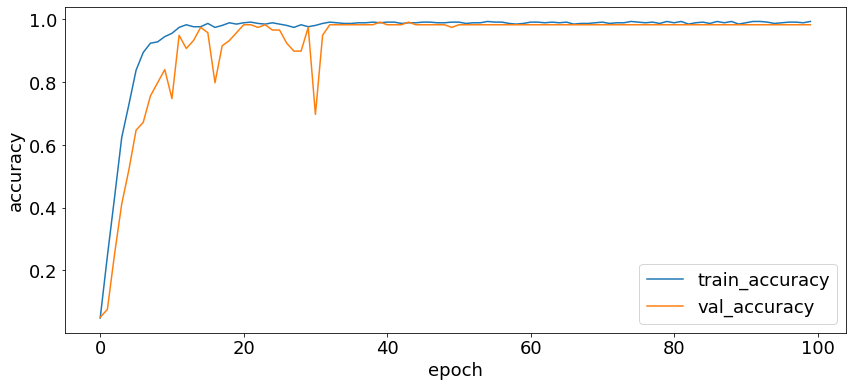

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

In [27]:
import pickle
from glob import iglob
import numpy as np
import librosa
from shutil import rmtree
from constants import *
from constants import DATA_AUDIO_DIR
DATA_AUDIO_VAL_DIR = './test_val_data'
OUTPUT_DIR_VAL_TRAIN = './output_val/train'
OUTPUT_DIR_VAL_TEST = './output_val/test'

DATA_AUDIO_DIR = './test_train_data'
list_dir = os.listdir(DATA_AUDIO_DIR)
list_dir.sort()

def mkdir_p(path):
    import errno
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise


# def del_folder(path):
#     try:
#         rmtree(path)
#     except:
#         pass


# del_folder(OUTPUT_DIR_TRAIN)
# del_folder(OUTPUT_DIR_TEST)
# mkdir_p(OUTPUT_DIR_TRAIN)
# mkdir_p(OUTPUT_DIR_TEST)

class_ids = {list_dir[i]: i for i in range(len(list_dir))}


def extract_class_id(wav_filename):
    return class_ids.get(wav_filename[16:-6])


def read_audio_from_filename(filename, target_sr):
    audio, _ = librosa.load(filename, sr=target_sr, mono=True)
    audio = audio.reshape(-1, 1)
    return audio


def convert_data():
    DATA_AUDIO_DIR = './test_train_data'
    list_dir = os.listdir(DATA_AUDIO_VAL_DIR)
    list_dir.sort()
    print(list_dir)
    AUDIO_LENGTH = 100000
    TARGET_SR = 8000
    for i, wav_filename in enumerate(iglob(os.path.join(DATA_AUDIO_VAL_DIR, '**/**.wav'), recursive=True)):
        print(i, wav_filename)
        class_id = extract_class_id(wav_filename)
        audio_buf = read_audio_from_filename(wav_filename, target_sr=TARGET_SR)
        # normalize mean 0, variance 1
        audio_buf = (audio_buf - np.mean(audio_buf)) / np.std(audio_buf)
        original_length = len(audio_buf)
        print(i, wav_filename, original_length, np.round(np.mean(audio_buf), 4), np.std(audio_buf))
        if original_length < AUDIO_LENGTH:
            audio_buf = np.concatenate((audio_buf, np.zeros(shape=(AUDIO_LENGTH - original_length, 1))))
            print('PAD New length =', len(audio_buf))
        elif original_length > AUDIO_LENGTH:
            audio_buf = audio_buf[20000:AUDIO_LENGTH+20000]
#             audio_buf = audio_buf[10000:AUDIO_LENGTH+10000]
            print('CUT New length =', len(audio_buf))

        output_folder = OUTPUT_DIR_VAL_TRAIN
#         if i % 5 == 0:
#             output_folder = OUTPUT_DIR_VAL_TEST

        output_filename = os.path.join(output_folder, str(wav_filename[16:-4]).replace('/', '_') + '.pkl')

        out = {'class_id': class_id,
               'audio': audio_buf,
               'sr': TARGET_SR}
        print("-----------------")
        print(out)
        with open(output_filename, 'wb') as w:
            pickle.dump(out, w)


if __name__ == '__main__':
    convert_data()

['2017019740001_kwakjuheon', '2017019740014_leesumin', '2017019740029_limdonggeun', '2017019770001_kwonyuna', '2017019880001_kimsubin']
0 ./test_val_data/2017019770001_kwonyuna/5.wav
0 ./test_val_data/2017019770001_kwonyuna/5.wav 187894 0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 35, 'audio': array([[ 1.5468692],
       [ 2.0160804],
       [ 2.2964208],
       ...,
       [ 0.7006027],
       [-0.6457971],
       [-2.3474176]], dtype=float32), 'sr': 8000}
1 ./test_val_data/2017019770001_kwonyuna/1.wav
1 ./test_val_data/2017019770001_kwonyuna/1.wav 210080 -0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 35, 'audio': array([[ 0.22509393],
       [ 0.29813018],
       [ 0.5094017 ],
       ...,
       [ 0.03959789],
       [ 0.01233975],
       [-0.01029631]], dtype=float32), 'sr': 8000}
2 ./test_val_data/2017019770001_kwonyuna/3.wav
2 ./test_val_data/2017019770001_kwonyuna/3.wav 201206 0.0 1.0000001
CUT New length = 100000
-----------------
{'cla

23 ./test_val_data/2017019740014_leesumin/4.wav 266571 0.0 0.99999994
CUT New length = 100000
-----------------
{'class_id': 13, 'audio': array([[-0.9562651],
       [-1.3622181],
       [-1.7810678],
       ...,
       [ 2.465702 ],
       [ 2.9454615],
       [ 3.3723752]], dtype=float32), 'sr': 8000}
24 ./test_val_data/2017019740014_leesumin/6.wav
24 ./test_val_data/2017019740014_leesumin/6.wav 260598 -0.0 1.0
CUT New length = 100000
-----------------
{'class_id': 13, 'audio': array([[-0.00233029],
       [ 0.02280869],
       [ 0.00356475],
       ...,
       [-0.47838593],
       [-0.4644224 ],
       [-0.54475516]], dtype=float32), 'sr': 8000}


In [29]:
from sklearn.metrics import accuracy_score

train_files_1 = glob(os.path.join(OUTPUT_DIR_VAL_TRAIN, '**.pkl'))
train_files_1.sort()

x_tr_1, y_tr_1 = get_data(train_files_1)
print('y_tr_1 : ', y_tr_1)

y_tr_12 = to_categorical(y_tr_1, num_classes=num_classes)

pred_out = model.predict(x_tr_1)

real =[]
pred_out_idex=[]

val_class_names = os.listdir(DATA_AUDIO_VAL_DIR)
print(val_class_names)
# val_class_names.sort()

DATA_AUDIO_DIR = './test_train_data'
list_dir = os.listdir(DATA_AUDIO_DIR)
list_dir.sort()

j = 0
for i,pred in zip(range(0, len(pred_out)), pred_out) :
    print("Predict :",list_dir[np.argmax(pred)], ", Real :", list_dir[y_tr_1[i]])
    real.append(list_dir.index(list_dir[y_tr_1[i]]))
    pred_out_idex.append(np.argmax(pred))
    
# get the accuracy
print (accuracy_score(real, pred_out_idex))

y_tr_1 :  [ 0  0  0  0  0  0 13 13 13 13 13 13 28 35 35 35 35 35 35 75 75 75 75 75
 75]
['2017019770001_kwonyuna', '2017019740001_kwakjuheon', '2017019880001_kimsubin', '2017019740029_limdonggeun', '2017019740014_leesumin']
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740014_leesumin , Real : 2017019740014_leesumin
Predict : 2017019740014_leesumin , Real : 2017019740014_leesumin
Predict : 2017019740014_leesumin , Real : 2017019740014_leesumin
Predict : 2017019740027_kwaksangpil , Real : 2017019740014_leesumin
Predict : 2017019740027_kwaksangpil , Real : 2017019740014_leesumin
Predict : 2017019740014_leesumi